<a href="https://colab.research.google.com/github/hyeonji-cho/2023-OUTTA/blob/main/2_data_preprocessing_visualization(%EC%8A%A4%EC%BC%88%EB%A0%88%ED%86%A4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules and load datasets

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin':
    plt.style.use('seaborn-darkgrid')
    rc('font', family = 'AppleGothic')

elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 패스 지정해주기
data_path = './esg_merge.csv'

df = pd.read_csv(data_path)

# 데이터 프레임 정리하기
df['company_id'] = df['Unnamed: 0']
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df = df.replace('-', np.nan) # -는 결측치로, nan으로 처리.

df.head()

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,한국ESG연구소,Moody's,MSCI,S&P,연도,company_id
0,AJ네트웍스,B,D,B,B,NaN,NaN,NaN,NaN,2020,0
1,AJ네트웍스,B,D,B,B,NaN,NaN,NaN,NaN,2021,0
2,AJ네트웍스,B+,C,B+,B+,NaN,NaN,NaN,NaN,2022,0
3,AJ네트웍스,B+,C,B+,B+,NaN,NaN,NaN,NaN,2023,0
4,AK홀딩스,B+,C,B+,B+,NaN,NaN,NaN,NaN,2020,1


# preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   회사명         3182 non-null   object
 1   KCGS_종합등급   3090 non-null   object
 2   KCGS_환경     3090 non-null   object
 3   KCGS_사회     3090 non-null   object
 4   KCGS_지배구조   3090 non-null   object
 5   한국ESG연구소    614 non-null    object
 6   Moody's     230 non-null    object
 7   MSCI        455 non-null    object
 8   S&P         1098 non-null   object
 9   연도          3182 non-null   int64 
 10  company_id  3182 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 273.6+ KB


In [ ]:
df.isna().sum() / len(df)

회사명           0.000000
KCGS_종합등급     0.028913
KCGS_환경       0.028913
KCGS_사회       0.028913
KCGS_지배구조     0.028913
한국ESG연구소      0.807040
Moody's       0.927718
MSCI          0.857008
S&P           0.654934
연도            0.000000
company_id    0.000000
dtype: float64

In [ ]:
## KCGS_종합등급 ~ KCGS_지배구조 4개의 column에 모두 결측치가 존재하는 행 90개가 있음.
## 이는 행을 drop하는 것이 좋을 것.
drop_rows = df[df[['KCGS_종합등급', 'KCGS_환경', 'KCGS_사회', 'KCGS_지배구조']].isna().all(axis=1)]

display(drop_rows.isna().sum())

df = df.drop(drop_rows.index, axis=0)

df.info()

회사명            0
KCGS_종합등급     92
KCGS_환경       92
KCGS_사회       92
KCGS_지배구조     92
한국ESG연구소      64
Moody's       92
MSCI          72
S&P           56
연도             0
company_id     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   회사명         3090 non-null   object
 1   KCGS_종합등급   3090 non-null   object
 2   KCGS_환경     3090 non-null   object
 3   KCGS_사회     3090 non-null   object
 4   KCGS_지배구조   3090 non-null   object
 5   한국ESG연구소    586 non-null    object
 6   Moody's     230 non-null    object
 7   MSCI        435 non-null    object
 8   S&P         1062 non-null   object
 9   연도          3090 non-null   int64 
 10  company_id  3090 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 289.7+ KB


In [ ]:
drop_columns = ["한국ESG연구소", "Moody's", "MSCI", "S&P"]
final_df = df.drop(drop_columns, axis=1)

## drop_columns는 결측치 비율이 너무 높아 해당 column을 제거하는 것이 타당.
## 우선 EDA는 제거할 column까지 하겠지만, 실제로는 drop하는 것이 좋을 것.

In [ ]:
categorical_variables = ['KCGS_종합등급', 'KCGS_환경', 'KCGS_사회', 'KCGS_지배구조']

In [ ]:
final_df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id
0,AJ네트웍스,B,D,B,B,2020,0
1,AJ네트웍스,B,D,B,B,2021,0
2,AJ네트웍스,B+,C,B+,B+,2022,0
3,AJ네트웍스,B+,C,B+,B+,2023,0
4,AK홀딩스,B+,C,B+,B+,2020,1
...,...,...,...,...,...,...,...
3177,흥국화재,B+,B,A,B,2021,792
3178,흥국화재,B+,C,B+,B+,2022,792
3179,흥아해운,D,D,C,D,2020,793
3180,흥아해운,D,D,C,D,2021,793


In [ ]:
# 정수 인코딩
rating_mapping = {'A': 4, 'A+': 4.5, 'B': 3, 'B+': 3.5, 'C': 2, 'D': 1}

rating_columns = ['KCGS_종합등급', 'KCGS_환경', 'KCGS_사회', 'KCGS_지배구조']

for col in rating_columns:
    final_df[f"{col}_encoded"] = final_df[col].map(rating_mapping)


In [ ]:
final_df.head()

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5


# EDA

In [ ]:
categorical_variables = ['KCGS_종합등급', 'KCGS_환경', 'KCGS_사회', 'KCGS_지배구조', '한국ESG연구소', "MSCI"]
numerical_variables = ["Moody's", "S&P"]

In [ ]:
def plotting_barh(df, col):
    vc = df[col].value_counts().head(10)

    fig, ax = plt.subplots()

    ax.set_title(f"{col} value count")

    ax.barh(vc.index, vc, height=0.6)

    for idx, v in enumerate(vc):
        ax.text(v, idx-0.05, str(v), ha='left')

    plt.show()

In [ ]:
def plotting_violin_box(df, col):
    data = df.loc[df[col].notna(), col].map(rating_mapping).astype(float)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].set_title(f"{col} violinplot + boxplot")

    sns.violinplot(x=data, ax=ax[0])
    sns.boxplot(x=data, ax=ax[1])

    plt.show()

In [ ]:
def plotting_by_year(df, col):
    group = df.groupby(['연도', col]).count()['company_id']

    ax = group.unstack().plot(kind='barh', figsize=(12, 8))

    ax.set_title(f"연도별 {col}의 분포")

    plt.show()

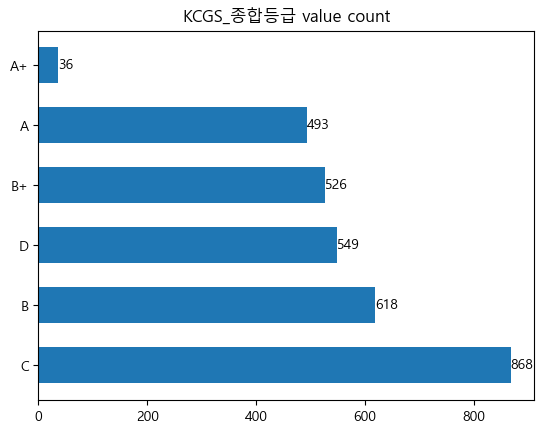

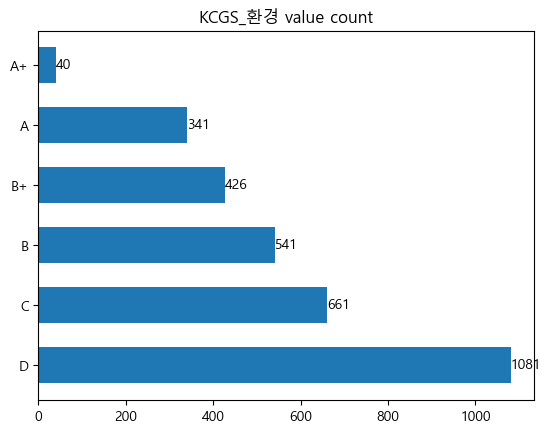

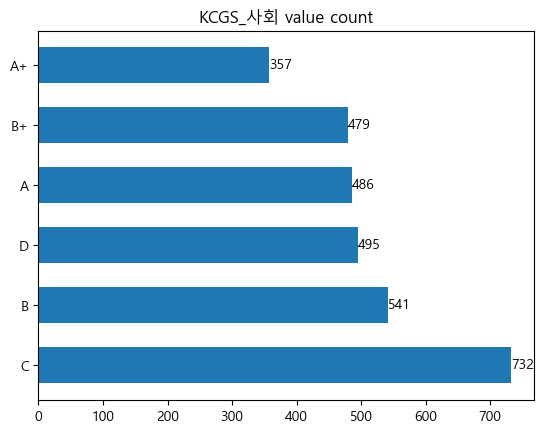

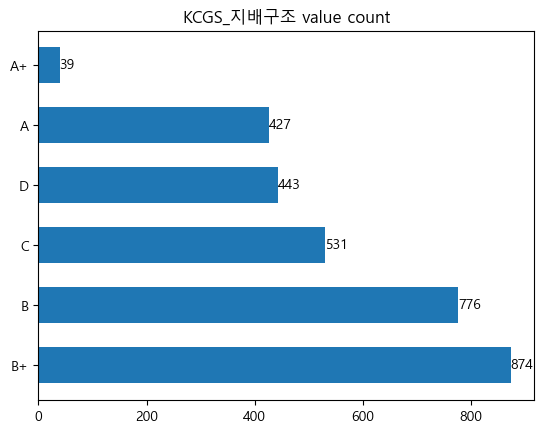

KeyError: '한국ESG연구소'

In [ ]:
# plotting categorical variable
for col in categorical_variables:
    plotting_barh(final_df, col)

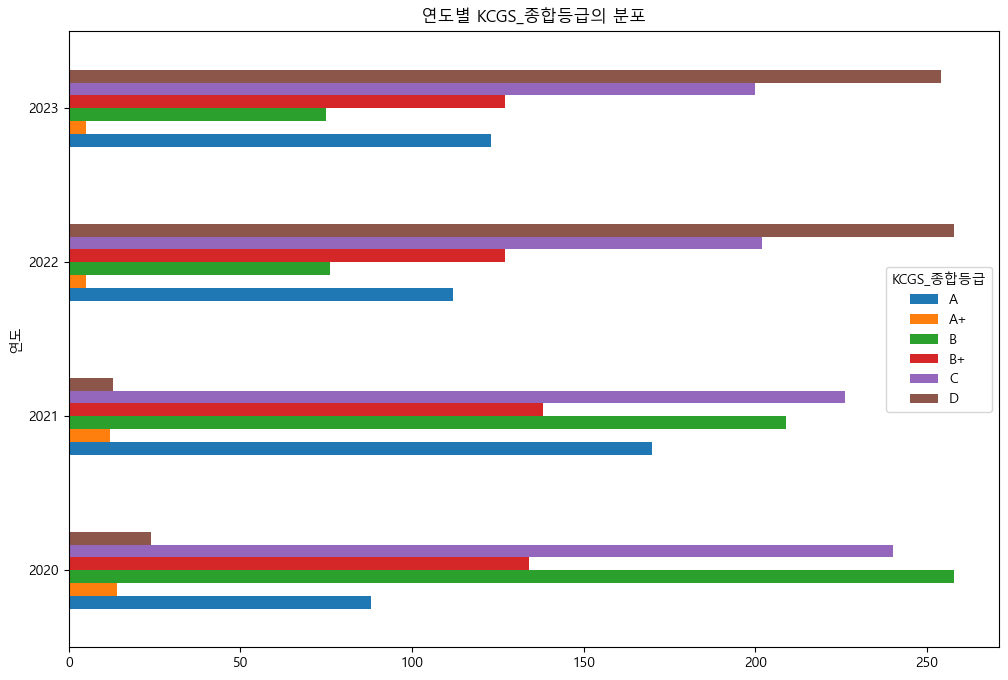

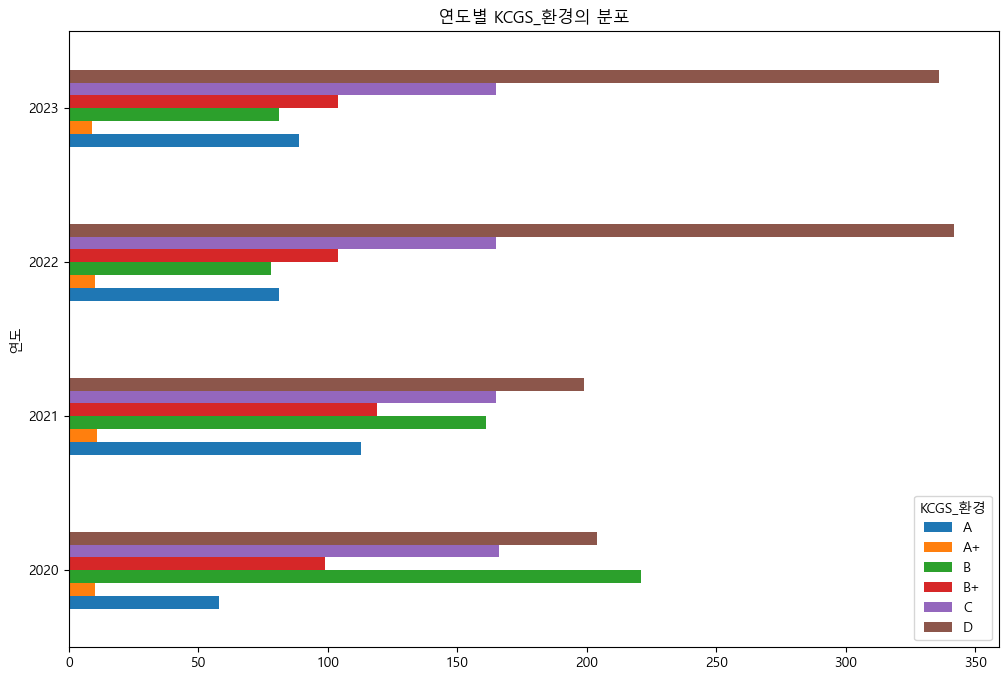

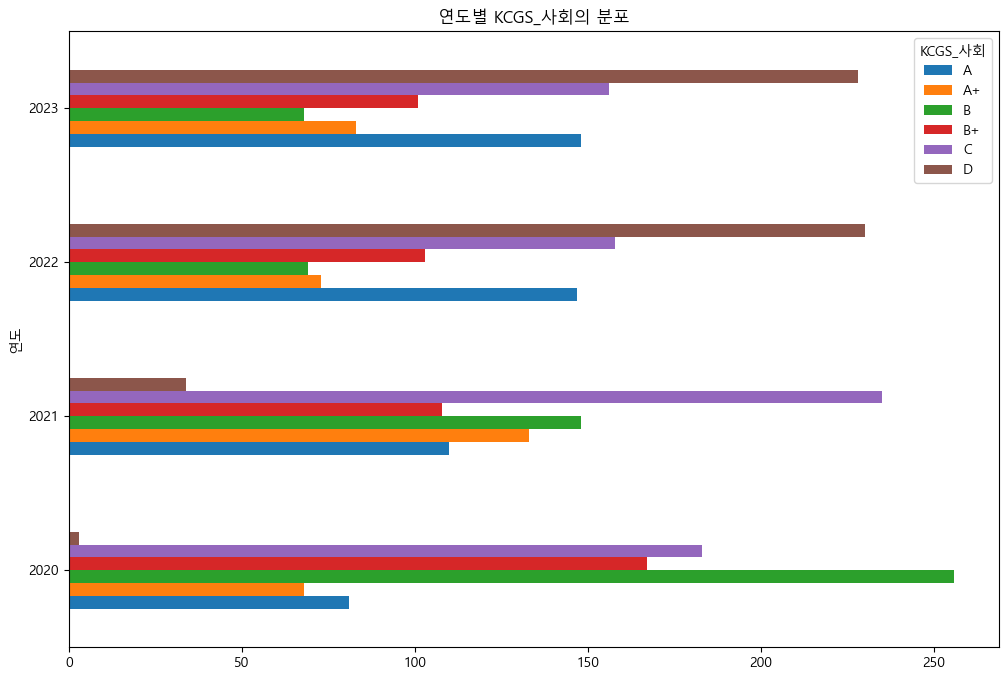

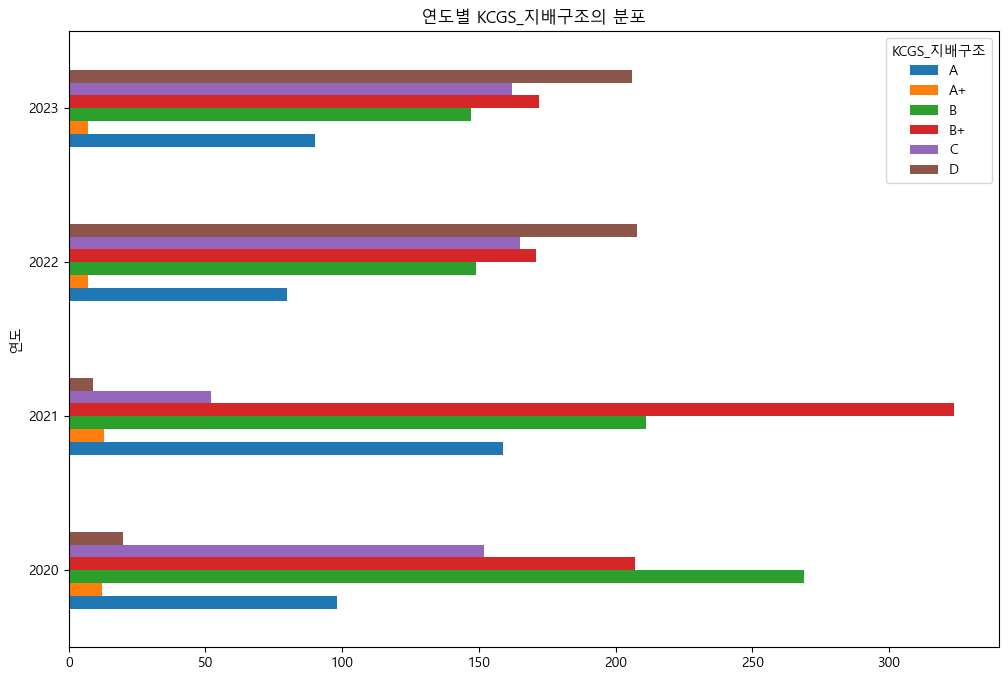

KeyError: '한국ESG연구소'

In [ ]:
# plotting categorical variable
for col in categorical_variables:
    plotting_by_year(final_df, col)

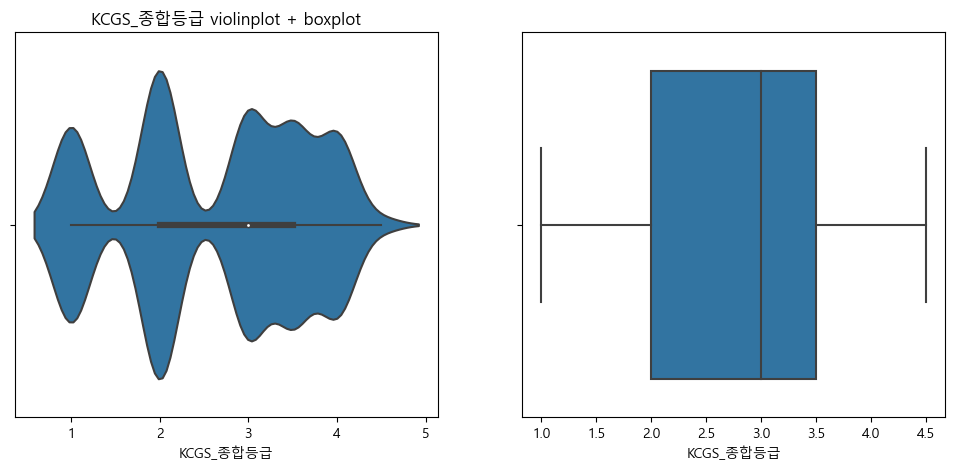

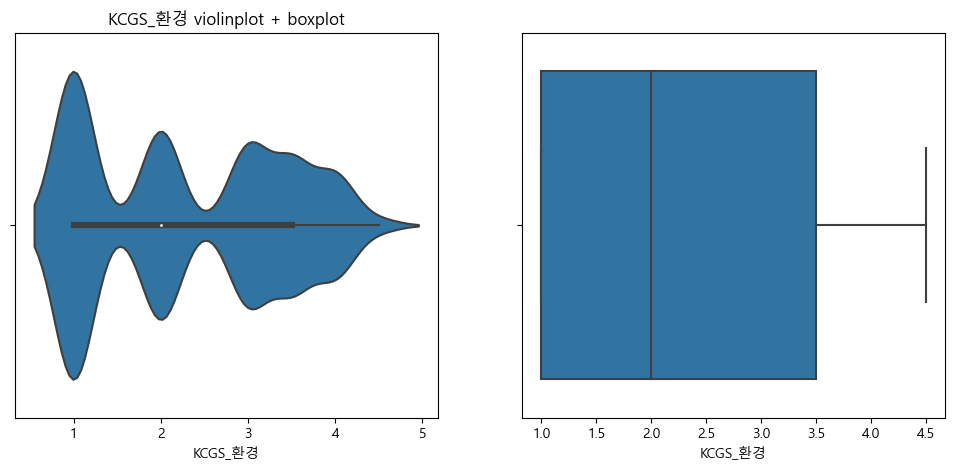

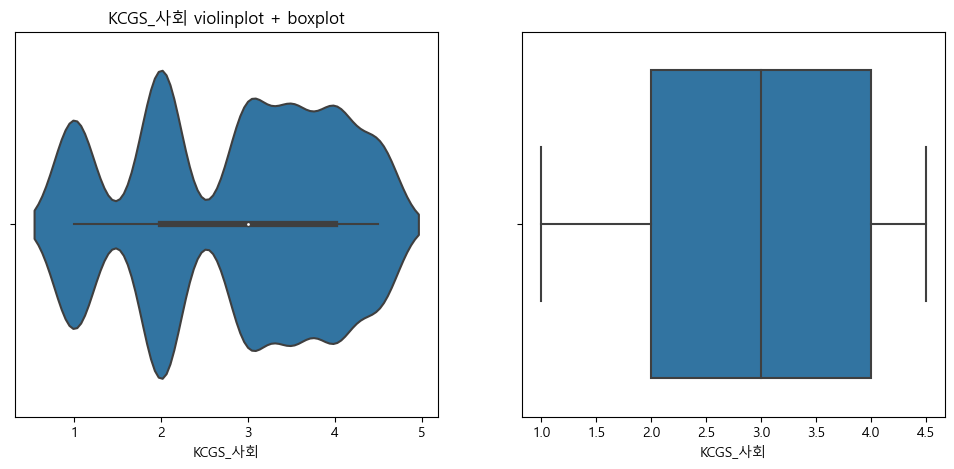

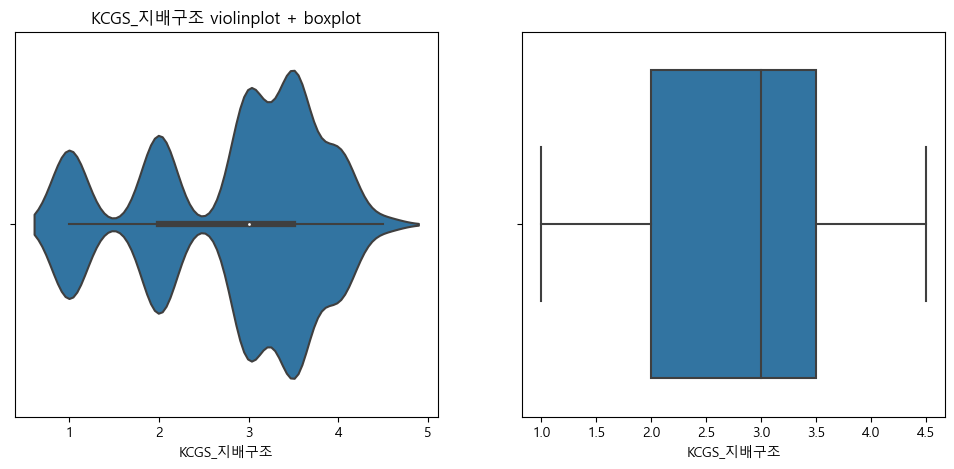

KeyError: '한국ESG연구소'

In [ ]:
for col in categorical_variables:
    plotting_violin_box(final_df, col)


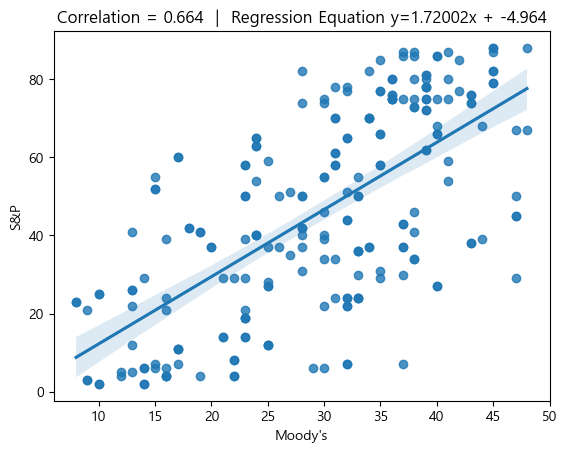

In [ ]:
v1 = numerical_variables[0]
v2 = numerical_variables[1]

df[v1] = df[v1].astype(float)
df[v2] = df[v2].astype(float)

temp_df = df[[v1, v2]].dropna()

fig, ax = plt.subplots()

corr = np.corrcoef(temp_df[v1], temp_df[v2])[0][1] # 상관관계를 계산하는 함수입니다.

z = np.polyfit(temp_df[v1], temp_df[v2], 1)

ax.set_title(f"Correlation = {round(corr, 3)}  |  Regression Equation y={round(z[0], 5)}x + {round(z[1], 3)}")

sns.regplot(data=temp_df, x=v1, y=v2)

plt.show();

# make final csv file

In [ ]:
final_df.to_csv("./esg_after_preprocessing.csv", encoding='utf-8-sig')